In [3]:
import numpy as np
import pandas as pd
from time import time

import matplotlib.pyplot as plt

from sklearn import manifold,datasets

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

# Next line to silence pyflakes. This import is needed.
Axes3D

%matplotlib inline

In [45]:
X,y = datasets.make_swiss_roll(n_samples=1000, noise=0.001, random_state=2)

# SPECTRAL EMBEDDING

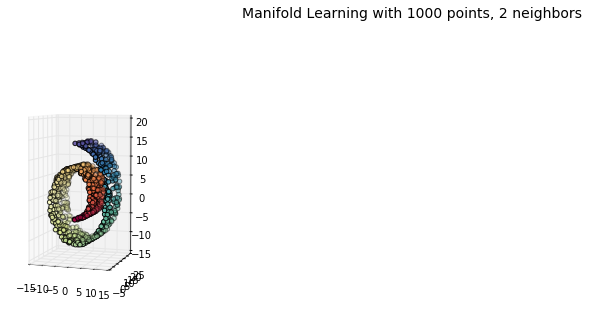

In [46]:
fig = plt.figure(figsize=(15, 10))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, 2), fontsize=14)

try:
    # compatibility matplotlib < 1.0
    ax = fig.add_subplot(251, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)
    ax.view_init(4, -72)
except:
    ax = fig.add_subplot(251, projection='3d')
    plt.scatter(X[:, 0], X[:, 2], c=y, cmap=plt.cm.Spectral)


SpectralEmbedding: 0.36 sec


(-0.49909163967041925,
 0.73585119373363372,
 -0.60054671155945039,
 0.60645945355422992)

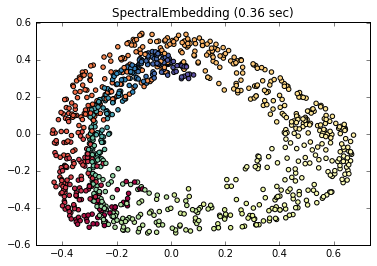

In [54]:
t0 = time()
se = manifold.SpectralEmbedding(n_components=2, eigen_solver='arpack')
S = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(S[:, 0], S[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# PRINCIPAL COMPONENT ANALYSIS

Principal Component Analysis: 0.0015 sec


(-13.454469848015481,
 13.646132730462563,
 -13.801999306191654,
 12.738394960716551)

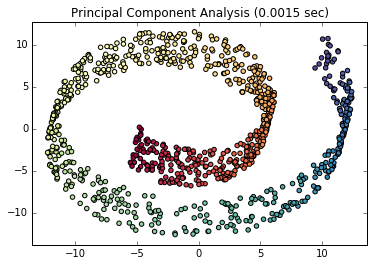

In [55]:
from sklearn.decomposition import PCA

t0 = time()
pca = PCA(n_components=2)
P = pca.fit_transform(X)
t1 = time()

print("Principal Component Analysis: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(P[:, 0], P[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title("Principal Component Analysis (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')